In [1]:
from style import HTMLStyler

styler = HTMLStyler()


In [2]:
styler.exec_styled_cell(-1)


In [3]:
styler.exec_styled_cell(0)


In [4]:
styler.exec_styled_cell(1)


In [5]:
styler.exec_styled_cell(2)


In [6]:
styler.exec_styled_cell(3)


In [7]:
styler.exec_styled_cell(4)


In [8]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

pd.set_option("display.precision", 2)
np.set_printoptions(precision=2, suppress=True)

housing = fetch_california_housing(as_frame=True)

features = housing.data
target = housing.target
housing = pd.concat([features, target], axis=1)


In [9]:
styler.exec_styled_cell(5)


In [10]:
styler.exec_styled_cell(6)


In [11]:
styler.exec_styled_cell(7)


In [12]:
styler.exec_styled_cell(8)


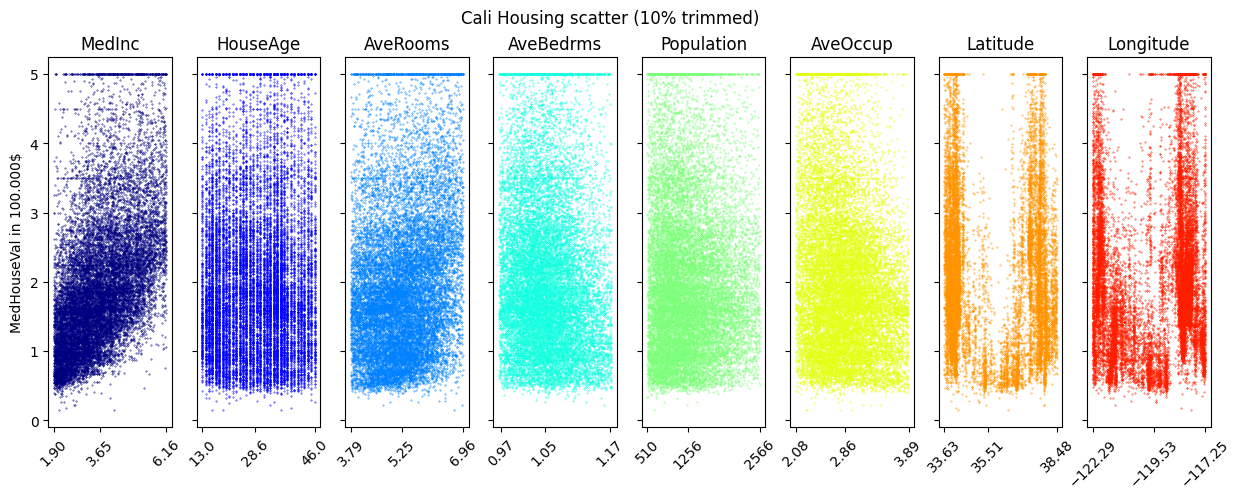

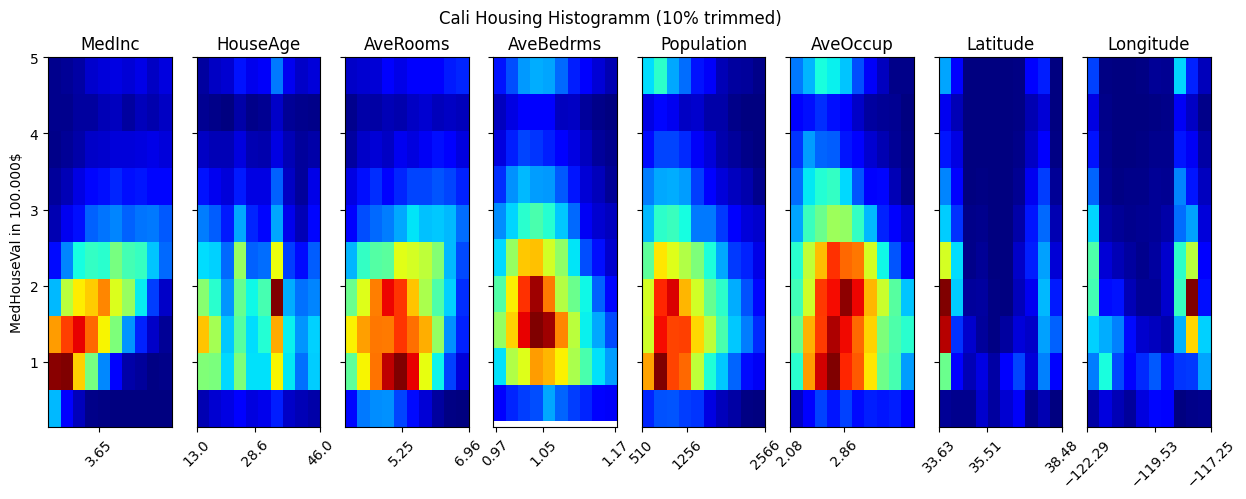

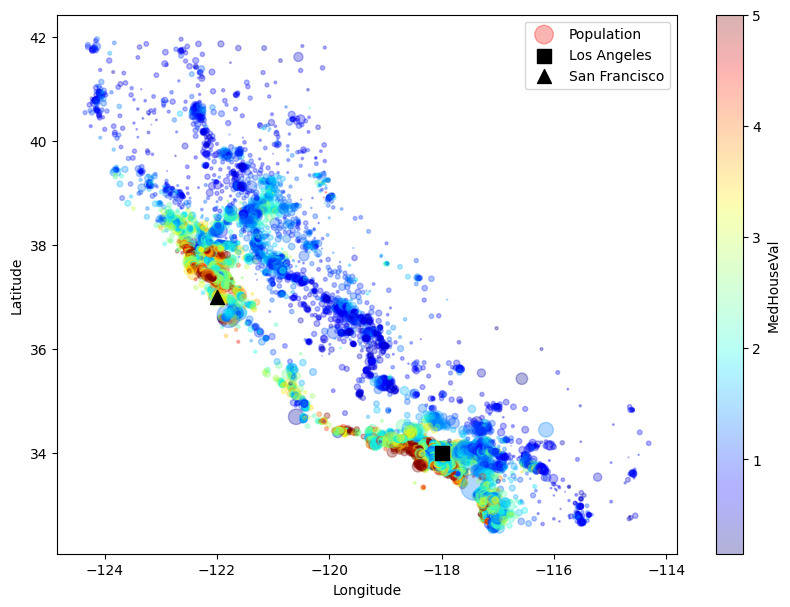

In [13]:
from printing import scatter_2d_dataset
from printing import hist_2d_dataset
from printing import map_plot

x = features.to_numpy()
y = target.to_numpy()
naming = features.columns.values.tolist()

scatter_2d_dataset(
    x, y, naming, title="Cali Housing scatter (10% trimmed)", alpha=1, trim_percent=10)

hist_2d_dataset(
    x, y, naming, title="Cali Housing Histogramm (10% trimmed)", trim_percent=10)

map_plot(pd.concat([features, target], axis=1))


In [14]:

# styler.exec_styled_cell(9)

# styler.exec_styled_cell(10)
# from printing import highlight_corr

# cor_un = housing.corr()
# cor_un.style.applymap(highlight_corr)

# styler.exec_styled_cell(11)

"""from calculations import calc_corr

feats = [
    features["MedInc"],
    features["HouseAge"],
    features["AveRooms"],
    features["AveBedrms"],
    features["Population"],
    features["AveOccup"],
    features["Latitude"],
    features["Longitude"],
]

corrs = calc_corr(feats, target)
indecees = features.columns.values
corr_wa = pd.DataFrame(
    index=indecees,
    data=corrs,
    columns=["MedHouseVal"]
)
print(corr_wa.sort_values(
    by="MedHouseVal",
    ascending=False)
)"""



In [19]:
styler.exec_styled_cell(12)


In [20]:
styler.exec_styled_cell(14)


In [21]:
from sklearn.preprocessing import StandardScaler

x = features.to_numpy()
y = target.to_numpy()

x_pre_scaled = x

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)


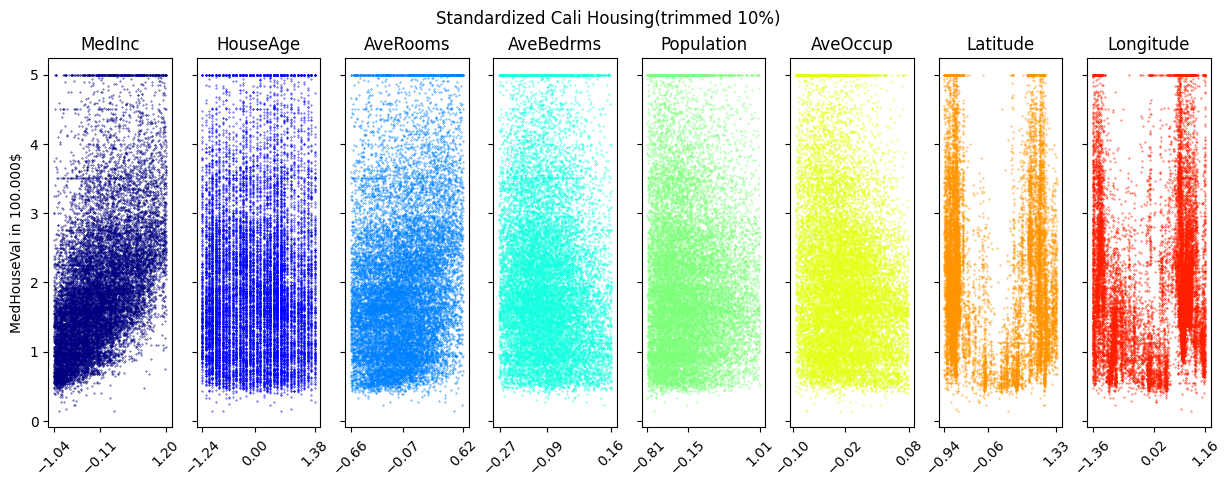

In [22]:
scatter_2d_dataset(
    x, y, naming, title="Standardized Cali Housing(trimmed 10%) ", alpha=1, trim_percent=10)


In [23]:
styler.exec_styled_cell(15)


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"x train size: {x_train.shape}")
print(f"y train size: {y_train.shape}")
print(f"x test size: {x_test.shape}")
print(f"y test size: {y_test.shape}")


x train size: (16512, 8)
y train size: (16512,)
x test size: (4128, 8)
y test size: (4128,)


In [25]:
styler.exec_styled_cell(16)


In [26]:

# styler.exec_styled_cell(17)

"""from sklearn.linear_model import LinearRegression"""


"""from printing import lin_plot

lins = np.linspace(-2, 4, 100)
regr = LinearRegression()
regr.fit(x_train[:, 0].reshape(-1, 1), y_train)
y_pred = regr.predict(lins.reshape(-1, 1))

lin_plot(x=x, y=y, y_pred=y_pred, x_test=lins)"""

# styler.exec_styled_cell(19)

"""from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

score = r2_score(y_test[:100], y_pred)
mape = mean_absolute_percentage_error(y_test[:100], y_pred)

print(f"score: {score:.2f}")
print(f"mape: {mape*100:.2f}%")"""


# styler.exec_styled_cell(20)

"""regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"score: {score:.2f}")
print(f"mape: {mape*100:.2f}%")"""



'regr = LinearRegression()\nregr.fit(x_train, y_train)\ny_pred = regr.predict(x_test)\n\nscore = r2_score(y_test, y_pred)\nmape = mean_absolute_percentage_error(y_test, y_pred)\n\nprint(f"score: {score:.2f}")\nprint(f"mape: {mape*100:.2f}%")'

In [27]:
from sklearn.tree import DecisionTreeRegressor

hyperparameters = {
    "criterion": "absolute_error",
    "max_depth": 20,
    "min_samples_split": 20,
    "min_samples_leaf": 10,
}
regr = DecisionTreeRegressor(**hyperparameters)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

In [28]:
styler.exec_styled_cell(18)

In [29]:
styler.exec_styled_cell(21)

In [31]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error

score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"score: {score:.2f}")
print(f"mape: {mape*100:.2f}%")

score: 0.71
mape: 21.45%


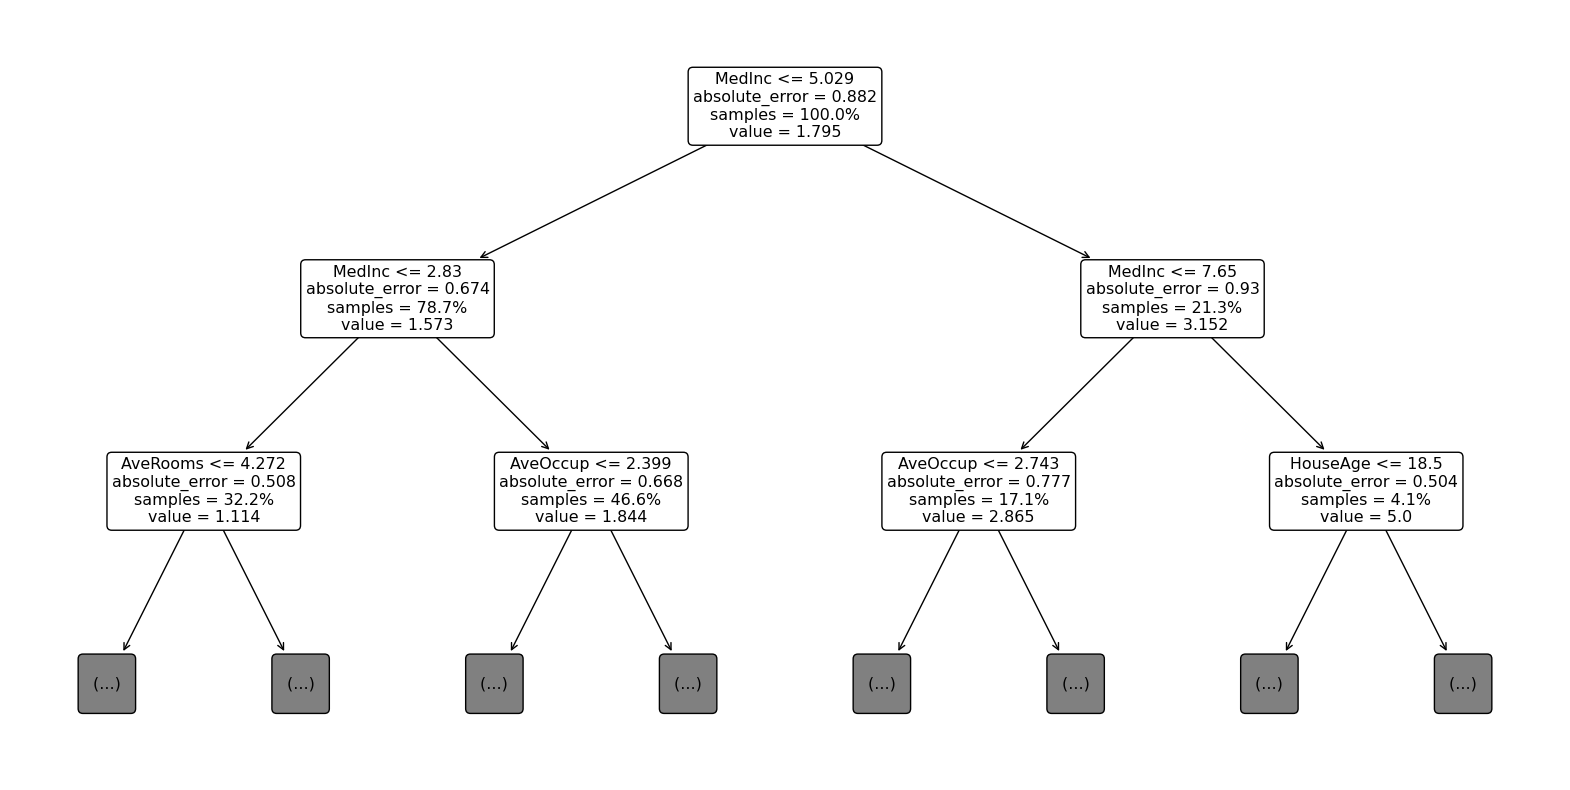

In [32]:
from printing import plot_prescaled_tree

params = {'criterion': 'absolute_error', 'max_depth': 30,
          'min_samples_leaf': 15, 'min_samples_split': 25}
plot_prescaled_tree(x=x_pre_scaled, y=y, params=params,
                    feature_names=housing.columns.values.tolist())


In [76]:
styler.exec_styled_cell(22)


In [77]:
styler.exec_styled_cell(23)


In [40]:
import joblib

joblib.dump(regr, "Cali_Housing_DecissionTree.pkl", compress=9)


['Cali_Housing_DecissionTree.pkl']

In [41]:
styler.exec_styled_cell(24)


In [ ]:
local_model = joblib.load("Cali_Housing_DecissionTree.pkl")
# local_model.predict(X)


In [ ]:
styler.exec_styled_cell(25)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

regr = GradientBoostingRegressor()

hyperparams = {
    "loss": ["absolute_error"],
    "n_estimators": [200, 250, 300],
    "max_depth": [20, 30],
    "min_samples_split": [45, 60, 80],
    "min_samples_leaf": [3, 5, 8],
}

grid = GridSearchCV(regr, hyperparams, cv=10, scoring="r2", n_jobs=-1)
grid.fit(x_train, y_train)

mean_test_scores = grid.cv_results_["mean_test_score"]
std_test_scores = grid.cv_results_["std_test_score"]
params = grid.cv_results_["params"]

for mean, std, params in zip(mean_test_scores, std_test_scores, params):
    print(f"params: {params}, mean: {mean:.2f}, std: {std:.2f}")

best_params = grid.best_params_
best_score = grid.best_score_

print(f"best_params: {best_params}")
print(f"best_score: {best_score:.2f}")

In [ ]:
regr = GradientBoostingRegressor(**best_params)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"r2_score: {score:.2f}")
print(f"mape: {mape*100:.2f} %")

In [ ]:
styler.exec_styled_cell(26)

removing Outliers and Datapoints on the 500.000 $ mark

In [ ]:
from sklearn.ensemble import IsolationForest

trimmed_housing = housing[housing["MedHouseVal"] < 4.9]

outlier_detector = IsolationForest(contamination=0.05)
outlier_detector.fit(trimmed_housing)
outliers = outlier_detector.predict(trimmed_housing)
trimmed_housing = trimmed_housing[outliers == 1]

trimmed_target = trimmed_housing["MedHouseVal"] 
trimmed_feats = trimmed_housing.drop(["MedHouseVal"],axis=1)

c:\Users\Rouven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
print(trimmed_feats.shape)
print(trimmed_target.shape)

trimm_x = trimmed_feats.to_numpy()
trimm_y = trimmed_target.to_numpy()

(18627, 8)
(18627,)


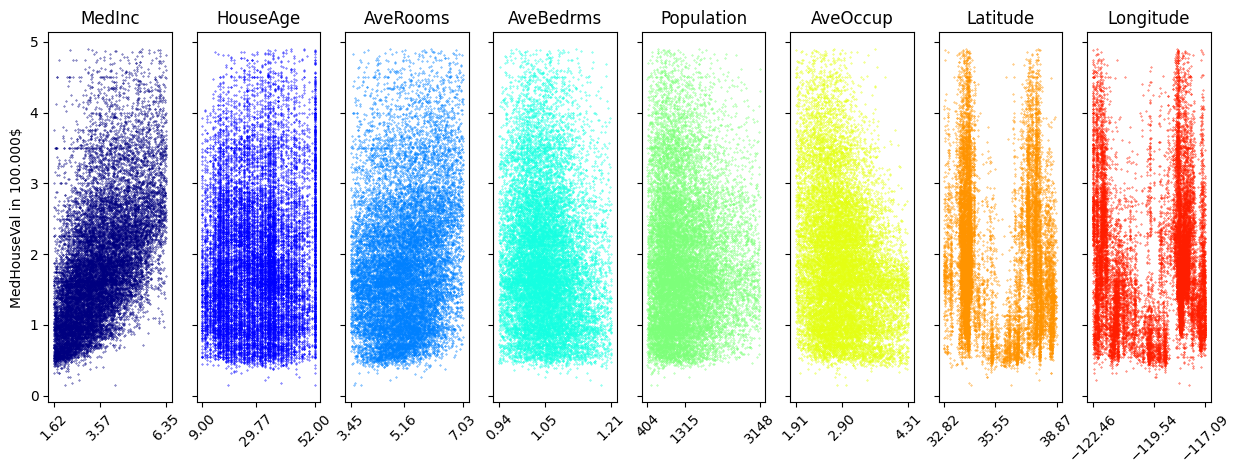

In [ ]:
scatter_2d_dataset(x = trimm_x,y = trimm_y,naming = naming,trim_percent=5,alpha=1)

Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

print(trimm_x.shape)

pca = PCA(n_components= 6)
pca.fit(trimm_x)
trimm_x = pca.transform(trimm_x)
print(trimm_x.shape)


(18627, 8)
(18627, 6)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(trimm_x,trimm_y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"score: {score:.2f}")
print(f"mape: {mape*100:.2f}%")

score: 0.59
mape: 28.43%


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor()

hyperparams = {
    "loss": ["absolute_error"],
    "n_estimators": [200, 250, 300],
    "max_depth": [20, 30],
    "min_samples_split": [45, 60, 80],
    "min_samples_leaf": [3, 5, 8],
}

grid = GridSearchCV(regr, hyperparams, cv=10, scoring="r2", n_jobs=-1)
grid.fit(x_train, y_train)

mean_test_scores = grid.cv_results_["mean_test_score"]
std_test_scores = grid.cv_results_["std_test_score"]
params = grid.cv_results_["params"]

for mean, std, params in zip(mean_test_scores, std_test_scores, params):
    print(f"params: {params}, mean: {mean:.2f}, std: {std:.2f}")

best_params = grid.best_params_
best_score = grid.best_score_

print(f"best_params: {best_params}")
print(f"best_score: {best_score:.2f}")

In [ ]:
regr = GradientBoostingRegressor(**best_params)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"r2_score: {score:.2f}")
print(f"mape: {mape*100:.2f} %")